## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [1]:
!pip install pandas_datareader

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

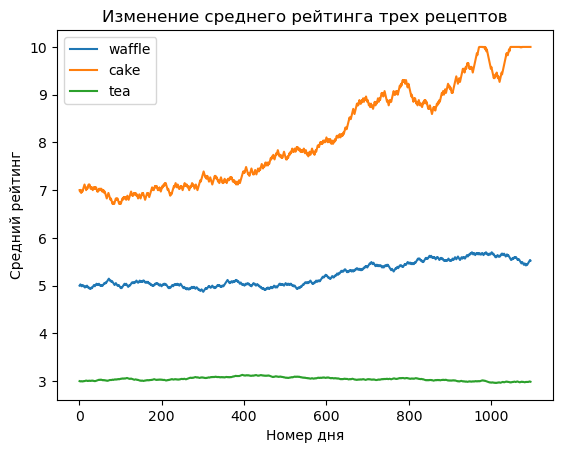

In [4]:
average_ratings = np.load('average_ratings.npy')
waffle_iron_french_toast = average_ratings[0]
zwetschgenkuchen_bavarian_plum_cake = average_ratings[1]
lime_tea = average_ratings[2]
days = [day for day in range(1, 1096)]

fig, ax = plt.subplots()

waffle, = ax.plot(days, waffle_iron_french_toast, label='waffle')
cake, = ax.plot(days, zwetschgenkuchen_bavarian_plum_cake, label='cake')
tea, = ax.plot(days, lime_tea, label='tea')

ax.set_xlabel('Номер дня') 
ax.set_ylabel('Средний рейтинг') 
ax.set_title('Изменение среднего рейтинга трех рецептов') 
ax.legend(handles=[waffle, cake, tea])

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


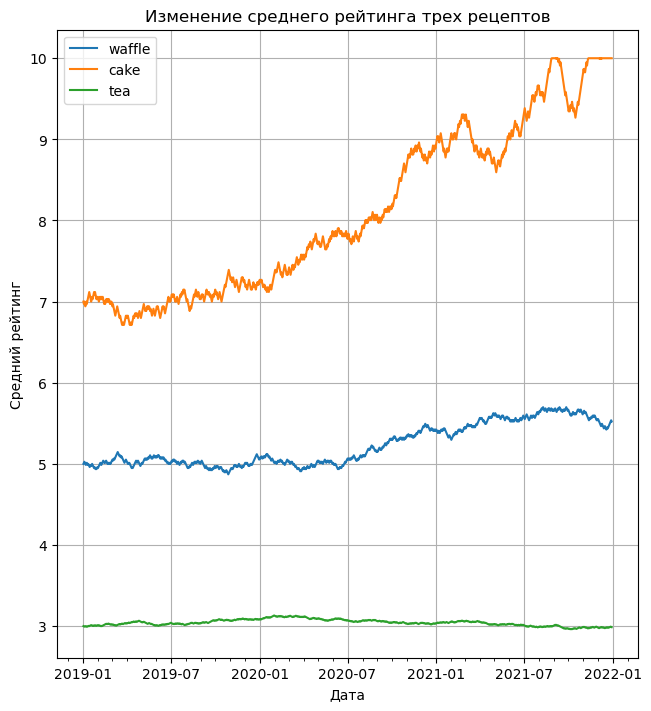

In [24]:
from matplotlib.dates import DateFormatter, MonthLocator

# Создание диапазона дат от 01.01.2019 по 30.12.2021
dates = pd.date_range(start='2019-01-01', end='2021-12-30', freq='D')

fig, ax = plt.subplots(figsize=(6.4, 7), layout='constrained')

waffle, = ax.plot(dates, waffle_iron_french_toast, label='waffle')
cake, = ax.plot(dates, zwetschgenkuchen_bavarian_plum_cake, label='cake')
tea, = ax.plot(dates, lime_tea, label='tea')

ax.set_xlabel('Дата')
ax.set_ylabel('Средний рейтинг')
ax.set_title('Изменение среднего рейтинга трех рецептов')
ax.legend(handles=[waffle, cake, tea])

ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)



3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

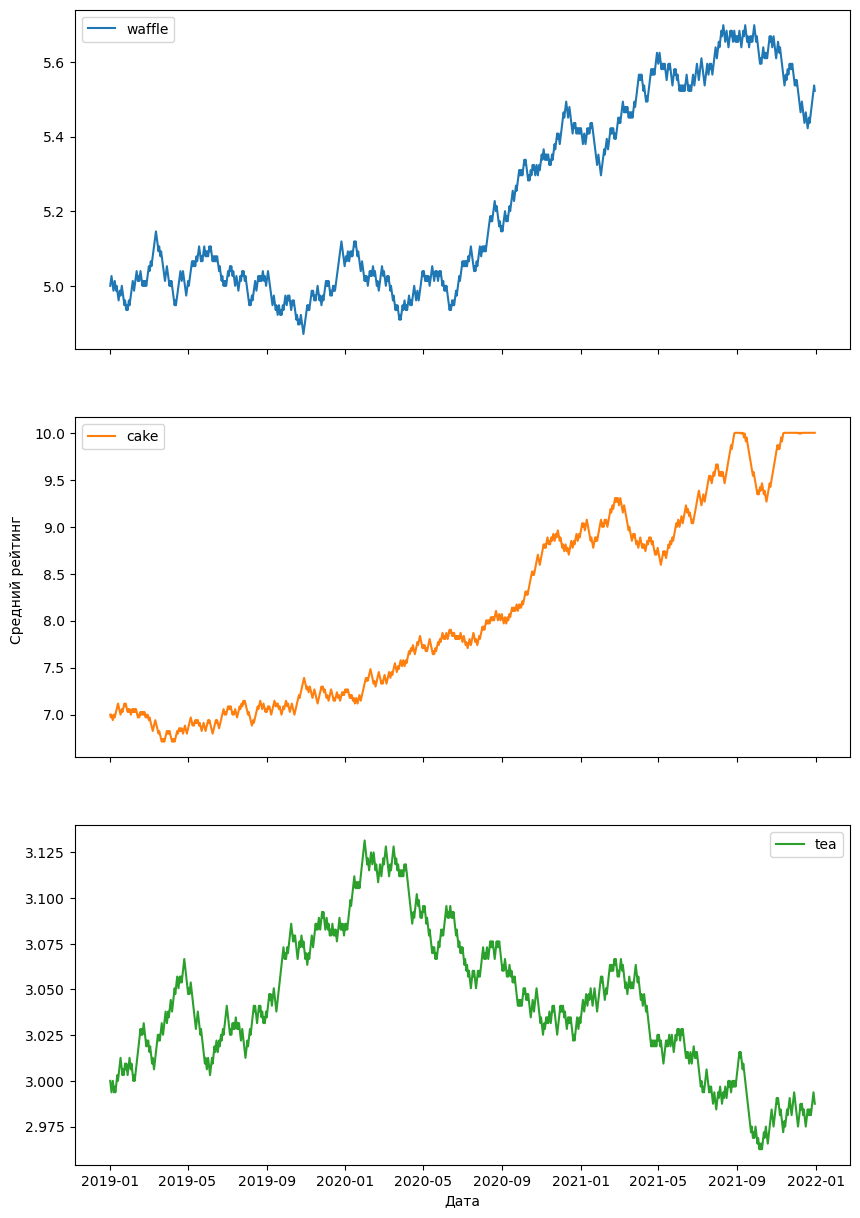

In [34]:
import matplotlib.colors as mcolors

fig, axs = plt.subplots(nrows=3, figsize=(10, 15))

tableau_colors = list(mcolors.TABLEAU_COLORS.values())

dates = pd.date_range(start='2019-01-01', end='2021-12-30', freq='D')

waffle, = axs[0].plot(dates, waffle_iron_french_toast, color=tableau_colors[0], label='waffle')
cake, = axs[1].plot(dates, zwetschgenkuchen_bavarian_plum_cake, color=tableau_colors[1], label='cake')
tea, = axs[2].plot(dates, lime_tea, color=tableau_colors[2], label='tea')

fig.text(0.06, 0.5, 'Средний рейтинг', va='center', rotation='vertical')

axs[0].set_xticklabels([]) 
axs[1].set_xticklabels([])  
axs[2].set_xlabel('Дата')

axs[0].legend(handles=[waffle])
axs[1].legend(handles=[cake])
axs[2].legend(handles=[tea])

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


Text(0.5, 1.0, '$y(x)=\\lambda e^{-\\lambda x}$')

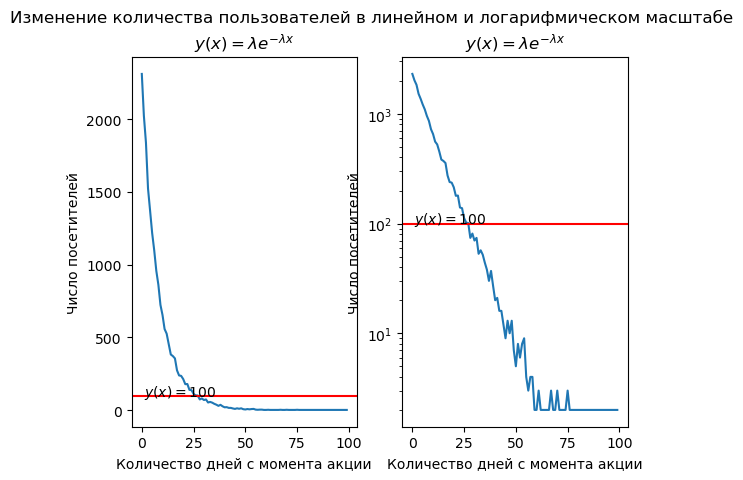

In [35]:
visitors = np.load('visitors.npy')
days = list(range(100))

fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')

lin, = ax1.plot(days, visitors)
log, = ax2.plot(days, visitors)

ax2.set_yscale("log")

ax1.set_xlabel('Количество дней с момента акции')
ax2.set_xlabel('Количество дней с момента акции')
ax1.set_ylabel('Число посетителей')
ax2.set_ylabel('Число посетителей')
ax1.axhline(y=100, color='r')
ax1.text(1, 100, '$y(x) = 100$')
ax2.axhline(y=100, color='r')
ax2.text(1, 100, '$y(x) = 100$')

ax1.set_title('$y(x)=\lambda e^{-\lambda x}$')
ax2.set_title('$y(x)=\lambda e^{-\lambda x}$')

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [36]:
reviews = pd.read_csv('reviews_sample.csv')
recipes = pd.read_csv('recipes_sample.csv')

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

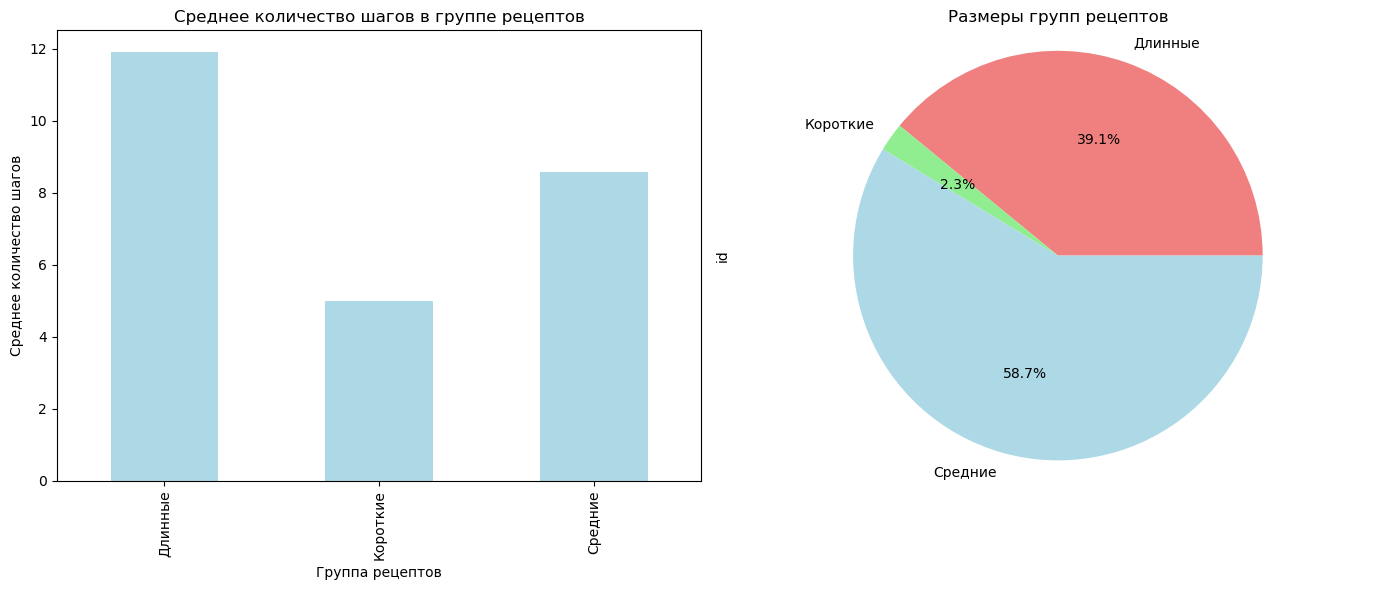

In [43]:
def categorize_duration(minutes):
    if minutes < 5:
        return 'Короткие'
    elif minutes >= 5 and minutes < 50:
        return 'Средние'
    else:
        return 'Длинные'


recipes['duration_category'] = recipes['minutes'].apply(categorize_duration)


grouped_data = recipes.groupby('duration_category').agg({'n_steps': 'mean', 'id': 'count'})


fig, axs = plt.subplots(1, 2, figsize=(14, 6))


grouped_data['n_steps'].plot(kind='bar', color='lightblue', ax=axs[0])
axs[0].set_xlabel('Группа рецептов')
axs[0].set_ylabel('Среднее количество шагов')
axs[0].set_title('Среднее количество шагов в группе рецептов')


grouped_data['id'].plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightblue'], ax=axs[1])
axs[1].axis('equal')
axs[1].set_title('Размеры групп рецептов')

plt.tight_layout()
plt.show()

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

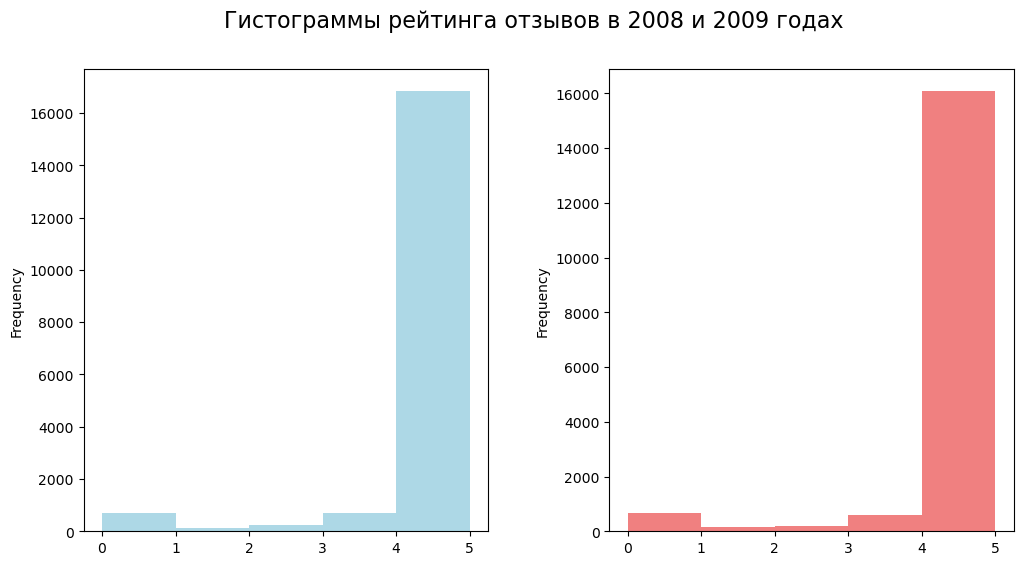

In [46]:

reviews['date'] = pd.to_datetime(reviews['date'])


filtered_reviews = reviews[(reviews['date'].dt.year == 2008) | (reviews['date'].dt.year == 2009)]


reviews_2008 = filtered_reviews[filtered_reviews['date'].dt.year == 2008]
reviews_2009 = filtered_reviews[filtered_reviews['date'].dt.year == 2009]


fig, axs = plt.subplots(1, 2, figsize=(12, 6))

reviews_2008['rating'].plot.hist(ax=axs[0], bins=5, color='lightblue')
reviews_2009['rating'].plot.hist(ax=axs[1], bins=5, color='lightcoral')


plt.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах', fontsize=16)


plt.subplots_adjust(wspace=0.3)

plt.show()

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

Text(0, 0.5, 'Количество ингредиентов')

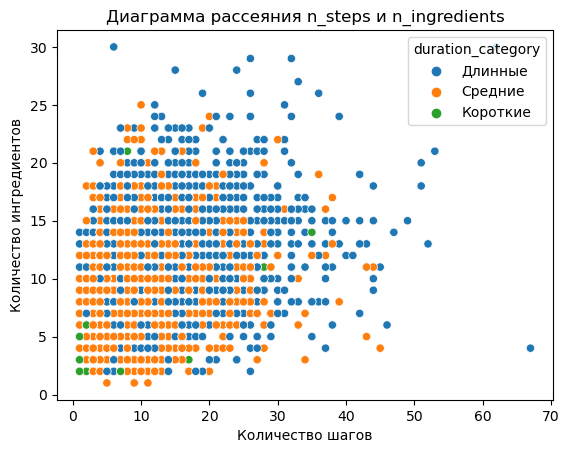

In [48]:
import seaborn as sns


plt.figure()
sns.scatterplot(data=recipes, x='n_steps', y='n_ingredients', hue='duration_category')
plt.title('Диаграмма рассеяния n_steps и n_ingredients')
plt.xlabel('Количество шагов')
plt.ylabel('Количество ингредиентов')

Можно наблюдать, что при увеличении количества шагов в рецепте увеличивается и количество используемых ингридиентов

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

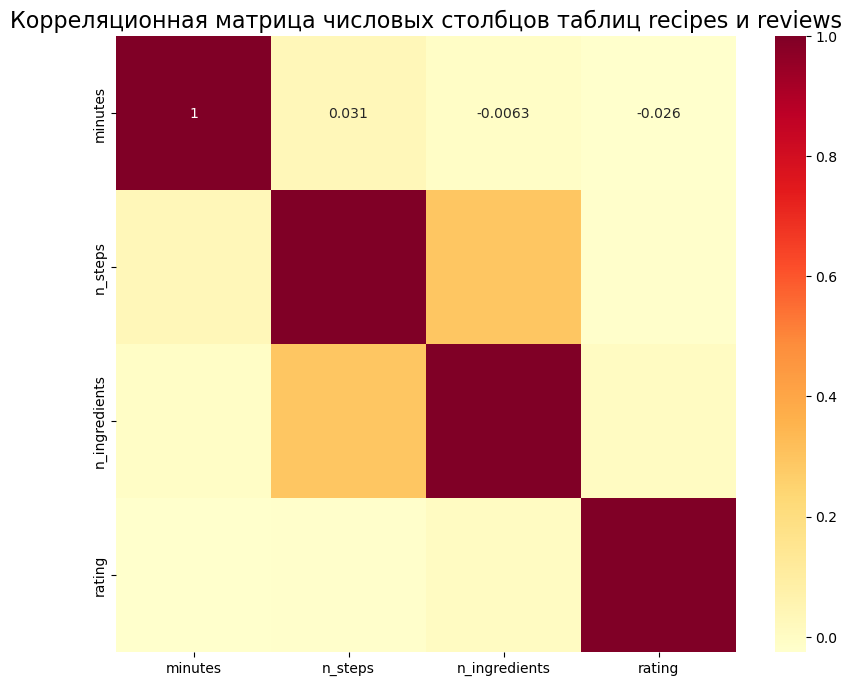

In [50]:
merged_df = pd.merge(recipes, reviews, left_on='id', right_on='recipe_id')


selected_columns = ['minutes', 'n_steps', 'n_ingredients', 'rating']
correlation_df = merged_df[selected_columns]


correlation_matrix = correlation_df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd')
plt.title('Корреляционная матрица числовых столбцов таблиц recipes и reviews', fontsize=16)
plt.show()